In [1]:
# Dependencies
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

## Other Variables Data Correlation

In [128]:
# Load/Read Happiness Index or Ladder Score
TGE_Sheri= "Data sets/TGE_Sheri.csv"
other_2017 = pd.read_csv(TGE_Sheri)
other_2017.head(5)

,Country,Code,Year,Gini income inequality index,Poverty percent of population,Public spending on education percent of public spending,Literacy rate,Tourist arrivals,International tourism revenue,Fragile state index 0 (low) - 120 (high),Security threats index 0 (low) - 10 (high),Human flight and brain drain index 0 (low) - 10 (high),Unemployment rate
0,Afghanistan,AFG,2017,NaN,NaN,15.66,NaN,NaN,16.0,17.3,1.0,8.2,11.18
1,Albania,ALB,2017,NaN,NaN,12.39,NaN,4643.0,2050.0,6.5,4.7,7.6,13.75
2,Algeria,DZA,2017,NaN,NaN,NaN,NaN,2451.0,172.0,76.8,7.2,5.8,12.00
3,Andorra,AND,2017,NaN,NaN,18.96,NaN,3003.0,NaN,NaN,NaN,NaN,0.00
4,Angola,AGO,2017,NaN,NaN,NaN,NaN,261.0,884.0,91.1,6.5,6.6,7.12


### Independent Variable - Happiness Index 

In [122]:
# Load/Read Happiness Index or Ladder Score
New_HappyIndex_mx = "Data sets/Clean Happiness Index Data Sets/New_HappyIndex_mx.csv"
happiness_index = pd.read_csv(New_HappyIndex_mx)
happiness_index.head(5)

,Country name,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Afghanistan,3.72,3.72,4.40,4.76,3.83,3.78,3.57,3.13,3.98,4.22,2.66
1,Albania,4.63,5.49,5.49,5.27,5.87,5.51,4.55,4.81,4.61,4.51,4.64
2,Argentina,6.07,5.96,6.42,6.44,6.78,6.47,6.58,6.67,6.70,6.43,6.04
3,Armenia,4.88,4.65,4.18,4.37,4.26,4.32,4.28,4.45,4.35,4.33,4.29
4,Australia,7.29,7.25,7.45,7.45,7.41,7.20,7.36,7.29,7.31,7.25,7.26


In [116]:
# Filter year 2017 and rename variable column for analysis
filter_2017 = happiness_index.drop(labels=['2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
                                             '2015', '2016'], axis=1)
happiness_2017 = filter_2017.rename(columns={'Country name': ' Country', '2017': '2017 Happiness Index'})
happiness_2017.head(1)

,Country,2017 Happiness Index
0,Afghanistan,2.66


In [127]:
happiness_2017.to_csv('Data sets/happiness_2017scores.csv', index=False)

In [126]:
other2017_varriables = pd.merge(happiness_index, happiness_2017, on='Country')

KeyError: 'Country'

In [124]:
from functools import reduce
data_sets2017 = [happiness_2017, other_variables2017]
other_2017 = reduce(lambda left,right: pd.merge(left,right,on='Country'), data_sets2017)
other_2017

KeyError: 'Country'

### GINI Income Inequality Index

In [114]:
GINI_2017 = other_variables2017
slice_columns = [4, 5, 6, 7, 8, 9, 10, 11, 12]
GINI_2017.drop(GINI_2017.columns[slice_columns], axis=1, inplace=True)
GINI_2017.head(1)

,Country,Code,Year,Gini income inequality index
0,Afghanistan,AFG,2017,NaN


In [115]:
from functools import reduce
data_sets2017 = [happiness_2017, GINI_2017]
other_2017 = reduce(lambda left,right: pd.merge(left,right,on='Country'), data_sets2017)

KeyError: 'Country'

In [83]:
# happiness_2017.drop(labels=['2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
#                                              '2015', '2016'], axis=1)
to_mergehappiness = happiness_2017.rename(columns={'Country name': 'Country'})
GINIvsHappy = pd.merge([GINI_data, to_mergehappiness], on='Country', how='outer', ignore_index=True)
to_mergehappiness

TypeError: merge() got an unexpected keyword argument 'ignore_index'

#### Observations: Out of the 187 countries, only 24 countries in the GINI Index data set had values.

In [69]:
GINI_data

,Country,Code,Year,Gini income inequality index
0,Afghanistan,AFG,2017,NaN
1,Albania,ALB,2017,NaN
2,Algeria,DZA,2017,NaN
3,Andorra,AND,2017,NaN
4,Angola,AGO,2017,NaN
...,...,...,...,...
182,Vanuatu,VUT,2017,NaN
183,Venezuela,VEN,2017,NaN
184,Vietnam,VNM,2017,NaN
185,Zambia,ZMB,2017,NaN


In [70]:
# Quick check about total NaNs and non-Null values
GINI_index.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country                       187 non-null    object 
 1   Code                          187 non-null    object 
 2   Year                          187 non-null    int64  
 3   Gini income inequality index  24 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.0+ KB


In [71]:
# # Display / Determine NaN values
# GINI_nulls = pd.isnull(GINI_index['Gini income inequality index'])
# GINI_index[GINI_nulls]

In [72]:
# Determine Top countries with data on GINI index
top_GINI_countries = GINI_data.sort_values(['Gini income inequality index'], ascending=False) 
top_GINI_countries.head(10)

,Country,Code,Year,Gini income inequality index
25,Brazil,BRA,2017,53.3
72,Honduras,HND,2017,50.5
130,Panama,PAN,2017,49.9
39,Colombia,COL,2017,49.7
132,Paraguay,PRY,2017,48.8
41,Costa Rica,CRC,2017,48.3
37,Chile,CHL,2017,46.6
51,Ecuador,ECU,2017,44.7
22,Bolivia,BOL,2017,44.0
133,Peru,PER,2017,43.3


### GINI Index vs Happiness

In [73]:
# happiness_2017.drop(labels=['2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
#                                              '2015', '2016'], axis=1)
to_mergehappiness = happiness_2017.rename(columns={'Country name': 'Country'})
GINIvsHappy = pd.merge( GINI_data, to_mergehappiness, on='Country', how='outer')
to_mergehappiness

,Country,2017 Happiness Index
0,Afghanistan,2.66
1,Albania,4.64
2,Argentina,6.04
3,Armenia,4.29
4,Australia,7.26
...,...,...
123,Venezuela,5.07
124,Vietnam,5.18
125,Yemen,3.25
126,Zambia,3.93


ValueError: x and y must be the same size

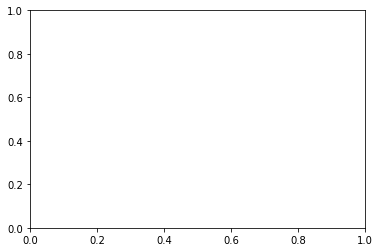

In [51]:
plt.scatter(other_variables2017['Gini income inequality index'],happiness_2017['2017 Happiness Index'],marker='o', c='cyan',
            edgecolor= 'black', alpha=0.70, s=50)
plt.title(f"Figure : Gini income inequality index vs. Happiness \n Y2017")
plt.xlabel(f"GGini income inequality index")
plt.ylabel(f"Happiness Index")
plt.grid(True)
plt.tight_layout
# plt.savefig('../Fig_Gini income inequality indexvsHappiness.png')
plt.show()